This is a linear regression modeling exercise that predicts housing price.

## Importing and Inspecting Data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
df = pd.read_csv('housing.csv')

In [53]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
df.shape

(20640, 10)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [56]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

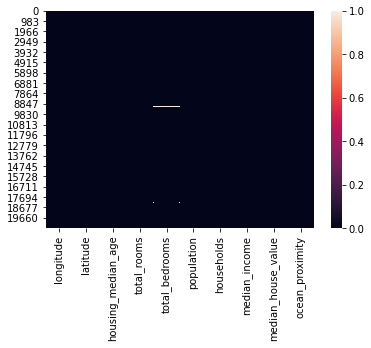

In [57]:
sns.heatmap(df.isnull())

array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='

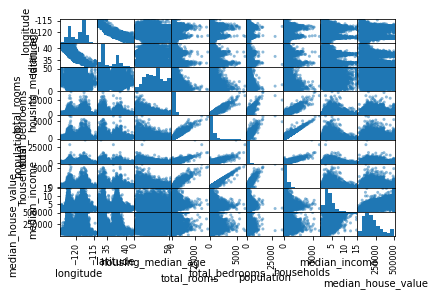

In [58]:
pd.plotting.scatter_matrix(df)

## Visualize Geographical Data

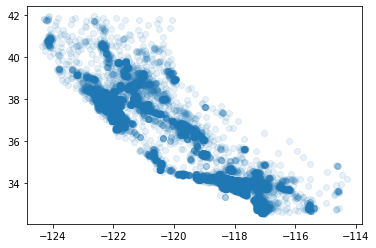

In [59]:
plt.scatter(df['longitude'], df['latitude'], alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

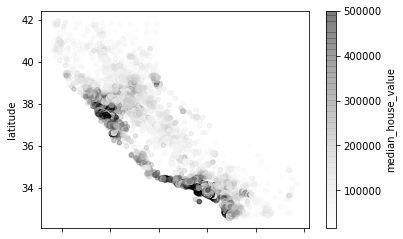

In [60]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c='median_house_value', colorbar=True)

We can see that the housing prices are generally higher along the coast.

## Look for Correlations with the median house value

Based on the scatterplot from above, let's look more closely at some of the features that seem to exhibit correlation with the median house value.

array([[<AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>]],
      dtype=object)

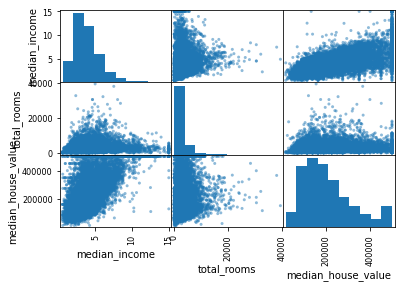

In [61]:
pd.plotting.scatter_matrix(df[['median_income', 'total_rooms', 'median_house_value']])

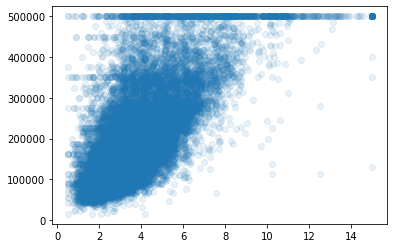

In [62]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.1)

It seems like median income has a strong linear relationship with the median house value. 

## Data Cleaning and Preparation

There are visible horizontal lines at around 500000, 460000, and 350000. This could be due to capping off values or other anomalies when the data was collected, so we see if we need to remove these data for a more accurate modeling.

In [63]:
df.sort_values(by='median_house_value', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10667,-117.88,33.55,27.0,2278.0,316.0,772.0,304.0,10.1275,500001.0,<1H OCEAN
16916,-122.34,37.57,52.0,2635.0,408.0,967.0,374.0,7.0422,500001.0,NEAR OCEAN
16946,-122.33,37.55,33.0,2199.0,312.0,827.0,319.0,6.1349,500001.0,NEAR OCEAN
8877,-118.49,34.04,48.0,2381.0,345.0,859.0,306.0,8.0257,500001.0,<1H OCEAN
8878,-118.50,34.04,52.0,3000.0,374.0,1143.0,375.0,15.0001,500001.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
5887,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
2521,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND


In [64]:
df.sort_values(by='median_house_value', ascending=False)
df[df['median_house_value']==500001].shape

(965, 10)

In [65]:
df.sort_values(by='median_house_value', ascending=False)
df[df['median_house_value']==500000].shape

(27, 10)

It seems like the median house value was capped and 500001 is the recorded maximum value. Let us remove the data at 500001.

In [66]:
ind = df[ df['median_house_value']==500001 ].index
df.drop(ind, inplace=True)

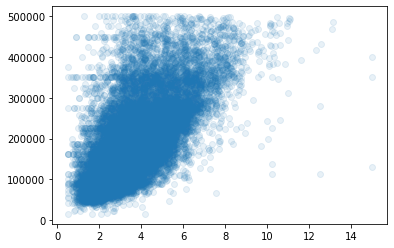

In [67]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.1)

There is no more horizontal line at the top. Let us see if the other anormalies at around 460000 and 350000 needs to be removed.

In [68]:
s = df[(df['median_house_value']>450000) & (df['median_house_value']<490000)].median_house_value
s.value_counts()

475000.0    8
483300.0    6
466700.0    4
470800.0    3
467600.0    3
           ..
463600.0    1
454300.0    1
451700.0    1
457100.0    1
489600.0    1
Name: median_house_value, Length: 153, dtype: int64

There are only 8 values with the same price at 475000, so this was likely not an anomaly that needs to be removed.

In [69]:
s = df[(df['median_house_value']>320000) & (df['median_house_value']<470000)].median_house_value
s.value_counts()

350000.0    79
450000.0    37
400000.0    27
325000.0    22
375000.0    22
            ..
398400.0     1
332300.0     1
463700.0     1
412700.0     1
409600.0     1
Name: median_house_value, Length: 1008, dtype: int64

However, there are 79 values at 350000 which may be significant enough, so we treat these as data to be removed.

In [70]:
ind = df[ df['median_house_value']==350000 ].index
df.drop(ind, inplace=True)

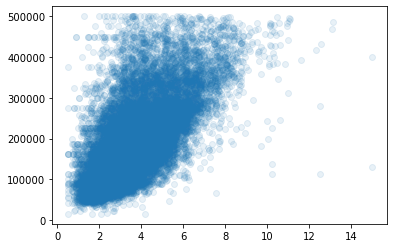

In [71]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.1)

Now the plot looks better. We finish up the data cleaning process.

## Remove the rows with missing values

In [72]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [73]:
df.dropna(subset=['total_bedrooms'], inplace=True)

## Split into train and test set

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
train, test = train_test_split(df, test_size = 0.2, random_state=5)

In [76]:
df['income_category'] = pd.cut(df['median_income'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])

In [77]:
df['income_category']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_category, Length: 19396, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<AxesSubplot:>

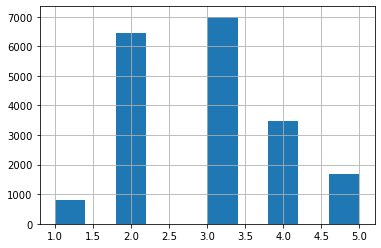

In [78]:
df['income_category'].hist()

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit

In [80]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(df, df['income_category']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [81]:
strat_test_set['income_category'].value_counts() / len(strat_test_set)

3    0.361082
2    0.332990
4    0.178608
5    0.086340
1    0.040979
Name: income_category, dtype: float64

In [82]:
df['income_category'].value_counts()/len(df)

3    0.360951
2    0.333007
4    0.178645
5    0.086306
1    0.041091
Name: income_category, dtype: float64

In [83]:
overall = df['income_category'].value_counts()/len(df)
random = strat_test_set['income_category'].value_counts()/len(strat_test_set)
(random/overall) -1

3    0.000365
2   -0.000051
4   -0.000206
5    0.000391
1   -0.002715
Name: income_category, dtype: float64

In [84]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## Converting categorical values into numerical values

### OrdinalEncoder

In [85]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [86]:
housing_cat = housing[['ocean_proximity']]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          6765
INLAND             5148
NEAR OCEAN         1952
NEAR BAY           1649
ISLAND                2
dtype: int64

In [87]:
housing_cat_encoded = oe.fit_transform(housing_cat)

In [88]:
hce = pd.DataFrame(housing_cat_encoded)
hce.value_counts()

0.0    6765
1.0    5148
4.0    1952
3.0    1649
2.0       2
dtype: int64

In [89]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### OneHotEncoder

In [90]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
housing_cat_1hot = ohe.fit_transform(housing_cat)
housing_cat_1hot

<15516x5 sparse matrix of type '<class 'numpy.float64'>'
	with 15516 stored elements in Compressed Sparse Row format>

In [91]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Transformation pipelines

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [93]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])

In [94]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [95]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [96]:
from sklearn.compose import ColumnTransformer

In [101]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', OneHotEncoder(), cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

## Train and make a prediction

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [104]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

### Prediction

In [110]:
lin_reg.predict(some_data_prepared)

array([245376.19467993, 105137.02676826, 137260.07182316, 326061.21660929,
       354918.24198487])

In [116]:
some_labels

19138    183600.0
1924     120100.0
11808    190500.0
18127    360600.0
8148     402500.0
Name: median_house_value, dtype: float64

### Compute the root mean sqaured error

In [118]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

59890.0344123084